# Proyek Analisis Data: Nama dataset
- Nama: M.Rizko Al akbar
- Email: mhmmdrizko@gmail.com
- Id Dicoding: rzkoxd

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 Pada musim apa rental sepeda paling banyak?
- pertanyaan 2 bagaimana performa rental sepeda tiap bulan pada tahun 2011?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

Dataset characteristics	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Gathering Data

##### Tabel day_df

In [2]:
day_df = pd.read_csv("bike_sharing/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


##### Tabel hour_df

In [3]:
hour_df = pd.read_csv("bike_sharing/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

##### Memeriksa data day_df

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Memeriksa tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Memeriksa missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Memeriska duplikasi
print("Jumlah Duplikasi:" , day_df.duplicated().sum())

Jumlah Duplikasi: 0


In [8]:
# Memeriksa statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### data hour_df

In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
# Memeriska tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Memeriksa missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Memeriksa duplikasi
print("Jumlah Duplikasi:", hour_df.duplicated().sum())

Jumlah Duplikasi: 0


In [13]:
# Memeriksa statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

##### Cleaning pada data day_df

In [14]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# menghapus kolom yang saya rasa tidak penting
day_df.drop(columns=["temp", "atemp","hum","windspeed"], inplace=True)

In [16]:
# Mengubah nama kolom
day_df.rename(columns={"dteday": "dateday",
                       "yr": "year",
                       "mnth": "month",
                       "casual": "user_casual",
                       "registered": 
                       "user_registered",
                       "cnt": "count"}, inplace=True)
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,user_casual,user_registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [17]:
# Merubah tipe data datetime
datetime = ["dateday"]

for x in datetime:
    day_df[x] = pd.to_datetime(day_df[x])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   dateday          731 non-null    datetime64[ns]
 2   season           731 non-null    int64         
 3   year             731 non-null    int64         
 4   month            731 non-null    int64         
 5   holiday          731 non-null    int64         
 6   weekday          731 non-null    int64         
 7   workingday       731 non-null    int64         
 8   weathersit       731 non-null    int64         
 9   user_casual      731 non-null    int64         
 10  user_registered  731 non-null    int64         
 11  count            731 non-null    int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 68.7 KB


##### Cleaning data hour_df

In [18]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Menghapus column 
hour_df.drop(columns=["temp", "atemp", "hum", "windspeed"], inplace=True)

In [20]:
hour_df.rename(columns={"dteday": "dateday",
                        "yr": "year", 
                        "mnth": "month", 
                        "casual": "user_casual",
                        "registered": "user_registered",
                        "cnt": "count"}, inplace=True)
hour_df.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,user_casual,user_registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [21]:
# Merubah tipe data datetime
datetime = ["dateday"]

for x in datetime:
    hour_df[x] = pd.to_datetime(hour_df[x])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          17379 non-null  int64         
 1   dateday          17379 non-null  datetime64[ns]
 2   season           17379 non-null  int64         
 3   year             17379 non-null  int64         
 4   month            17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday          17379 non-null  int64         
 7   weekday          17379 non-null  int64         
 8   workingday       17379 non-null  int64         
 9   weathersit       17379 non-null  int64         
 10  user_casual      17379 non-null  int64         
 11  user_registered  17379 non-null  int64         
 12  count            17379 non-null  int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 1.7 MB


## Exploratory Data Analysis (EDA)

### Explore ...

##### Explore data day_df

In [22]:
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,user_casual,user_registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,686.622488,1560.256377,1937.211452


In [23]:
# Explore jumlah rental setiap musim
day_df.groupby(by="season").agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
})

,user_casual,user_registered,count
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [24]:
# Explore jumlah rental tiap tahun
day_df.groupby(by="year").agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
})

,user_casual,user_registered,count
year,,,
0,247252,995851,1243103
1,372765,1676811,2049576


In [25]:
# Explore jumlah rental setiap bulan
day_df.groupby(by=["month"]).agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
})

,user_casual,user_registered,count
month,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


In [26]:
# Explore perental berdasarkan hari
day_df.groupby(by="weekday").agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
})

,user_casual,user_registered,count
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


##### Explore data hour_df

In [27]:
hour_df.describe(include="all")

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,user_casual,user_registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,49.305030,151.357286,181.387599


In [28]:
# Explore jumlah rental setiap musim
hour_df.groupby(by="season").agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
})

,user_casual,user_registered,count
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [29]:
# Explore jumlah rental tiap tahun
hour_df.groupby(by="year").agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
})

,user_casual,user_registered,count
year,,,
0,247252,995851,1243103
1,372765,1676811,2049576


In [30]:
# Explore jumlah rental setiap bulan
hour_df.groupby(by=["month"]).agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
})

,user_casual,user_registered,count
month,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


In [31]:
# Explore perental berdasarkan hari
day_df.groupby(by="weekday").agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
})

,user_casual,user_registered,count
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


## Visualization & Explanatory Analysis

### Pertanyaan 1:Pada musim apa rental sepeda paling banyak

In [32]:
# Explore total jumlah rental sepeda tiap musim
day_df.groupby(by="season").agg({
    "user_casual": "sum",
    "user_registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)

,user_casual,user_registered,count
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


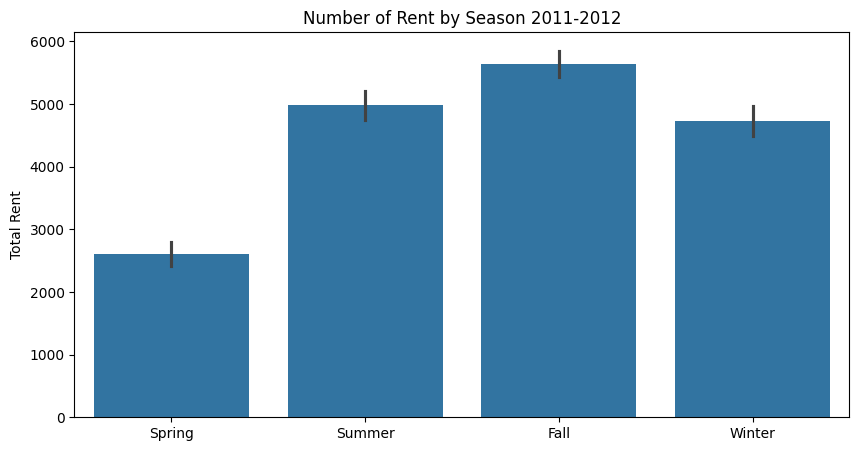

In [46]:
# Visualisasi data menggunakan seaborn
day_df["season"] = day_df.season.apply(lambda x: "Spring" if x == 1 else "Summer" if x == 2 else "Fall" if x == 3 else "Winter")

plt.figure(figsize=(10, 5))

sns.barplot(
    data=day_df,
    x="season",
    y="count"
)
plt.xlabel(None)
plt.ylabel("Total Rent")
plt.title("Number of Rent by Season 2011-2012")
plt.show()


### Pertanyaan 2: bagaimana performa rental sepeda setiap bulan pada tahun 2011?

In [34]:
# Explore total jumlah rental berdasarkan bulan dan tahun
day_df.groupby(by=["year", "month"]).agg({
    "count": "sum"
})

count
year month        
0    1       38189
     2       48215
     3       64045
     4       94870
     5      135821
     6      143512
     7      141341
     8      136691
     9      127418
     10     123511
     11     102167
     12      87323
1    1       96744
     2      103137
     3      164875
     4      174224
     5      195865
     6      202830
     7      203607
     8      214503
     9      218573
     10     198841
     11     152664
     12     123713

In [35]:
# Mengubah label data
day_df["year"] = day_df.year.apply(lambda x: 2011 if x == 0 else 2012)
day_df["month"] = day_df.month.apply(lambda x: "January" if x == 1 else "February" if x == 2 else "March" if x == 3 else "April" if x == 4 else "May" if x == 5 else "June" if x == 6 else "July" if x == 7 else "August" if x == 8 else "September" if x == 9 else "October" if x == 10 else "Novemver" if x == 11 else "December")

day_df.groupby(by=["year", "month"]).agg({
    "count": "sum"
})

count
year month            
2011 April       94870
     August     136691
     December    87323
     February    48215
     January     38189
     July       141341
     June       143512
     March       64045
     May        135821
     Novemver   102167
     October    123511
     September  127418
2012 April      174224
     August     214503
     December   123713
     February   103137
     January     96744
     July       203607
     June       202830
     March      164875
     May        195865
     Novemver   152664
     October    198841
     September  218573

In [57]:
# Mengambil tabel total jumlah rental sepeda tiap bulan pada tahun 2011
year_2011_df = day_df[(day_df["year"] == 2011)]
year_2011_df.groupby(by=["year", "month"]).agg({
    "count": "sum"
})

count
year month            
2011 April       94870
     August     136691
     December    87323
     February    48215
     January     38189
     July       141341
     June       143512
     March       64045
     May        135821
     Novemver   102167
     October    123511
     September  127418

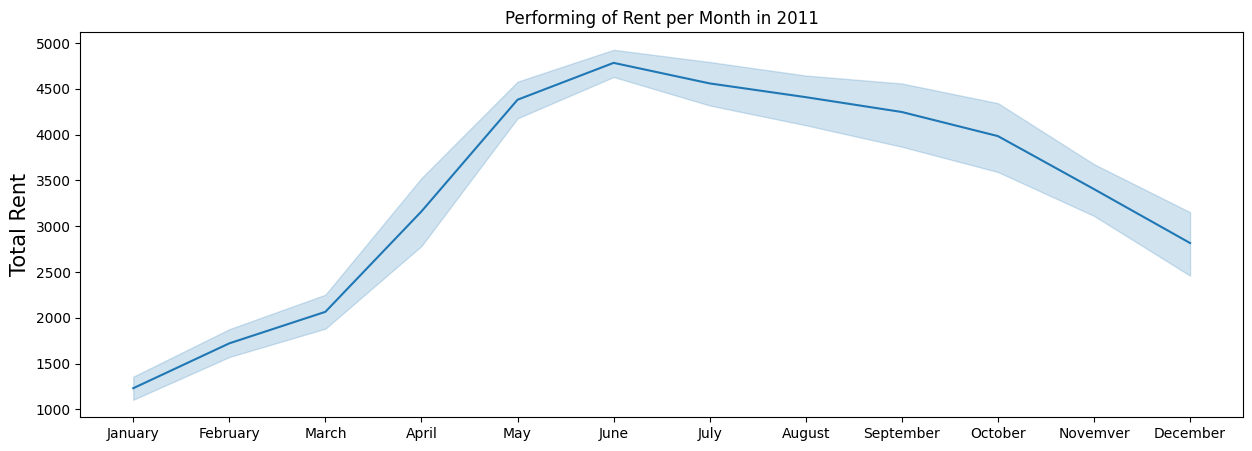

In [67]:
# Visualisasi data menggunakan seaborn
plt.figure(figsize=(15, 5))

sns.lineplot(x="month", 
             y="count",
             data=year_2011_df)
plt.title("Performing of Rent per Month in 2011")
plt.xlabel(None)
plt.ylabel("Total Rent", fontsize=15)
plt.show()


## Conclusion

### Conclusi Pertanyaan 1 :
#### Berdasarkan visualisasi data, musim dengan jumlah perental sepeda paling banyak ada pada musim Gugur(Fall) sedangkan musim dengan jumlah rental paling sedikit terdapat pada musim Semi(Spring).

### Conclusi Pertanyaan 2 :
#### Berdasarkan visualisasi data diatas, kita dapat melihat bahwa jumlah rent naik tiap bulannya dan pada bulan June adalah puncak jumlah rent terbanyak lalu mengalami penurunan jumlah yang signifikan dari July-December.

In [68]:
day_df.to_csv("data_1.csv", index=False)